Nama: Anissa Fauziah

NIM: 19/443565/TK/48761

# TUGAS MATA KULIAH ARTIFICIAL INTELLIGENCE
## Membuat Model Machine Learning

## Mengimport library yang digunakan

In [1]:
# mengimport library
import numpy as np
import pandas as pd

## Mengolah dataset

In [2]:
# mengunggah file ke python
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (2).csv


In [3]:
# membaca data yang diunggah
import io
data = pd.read_csv(io.BytesIO(uploaded['car data.csv']))

In [4]:
data # menampilkan data yang diunggah

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
data = data[['Year','Present_Price', 'Kms_Driven', 'Selling_Price']] # mengambil beberapa parameter yang digunakan dari keseluruhan data
data # menampiln set data yang baru (hanya attribute yang terpilih)

,Year,Present_Price,Kms_Driven,Selling_Price
0,2014,5.59,27000,3.35
1,2013,9.54,43000,4.75
2,2017,9.85,6900,7.25
3,2011,4.15,5200,2.85
4,2014,6.87,42450,4.60
...,...,...,...,...
296,2016,11.60,33988,9.50
297,2015,5.90,60000,4.00
298,2009,11.00,87934,3.35
299,2017,12.50,9000,11.50


In [22]:
#memodifikasi dataframe dengan mengubah nama attribute ke bahasa Indonesia
prediksi_data = pd.DataFrame({'Tahun pembelian': data['Year'],
                               'Harga Mobil Baru Saat Ini': data['Present_Price'],
                               'Jarak Tempuh (KM)': data['Kms_Driven'],
                               'Harga Jual Mobil Bekas': data['Selling_Price'],
                               })
prediksi_data

,Tahun pembelian,Harga Mobil Baru Saat Ini,Jarak Tempuh (KM),Harga Jual Mobil Bekas
0,2014,5.59,27000,3.35
1,2013,9.54,43000,4.75
2,2017,9.85,6900,7.25
3,2011,4.15,5200,2.85
4,2014,6.87,42450,4.60
...,...,...,...,...
296,2016,11.60,33988,9.50
297,2015,5.90,60000,4.00
298,2009,11.00,87934,3.35
299,2017,12.50,9000,11.50


In [23]:
# shaping data
data_np = data.to_numpy() #mengubah data ke numpy
data_np.shape #menampilkan shape data

(301, 4)

In [27]:
# shaping data
X_train = data_np[:, :3] #variabel X_train untuk mentraining data ialah semua baris dalam tabel dan kolom hingga kolom ketiga
y_train = data_np[:, -1] #variabel y_train untuk mentraining data ialah semua baris dalam tabel dan kolom terakhir
X_train.shape, y_train.shape #menampilkan ukuran variabel X_train dan y_train

((301, 3), (301,))

## Membuat fungsi yang digunakan untuk regresi

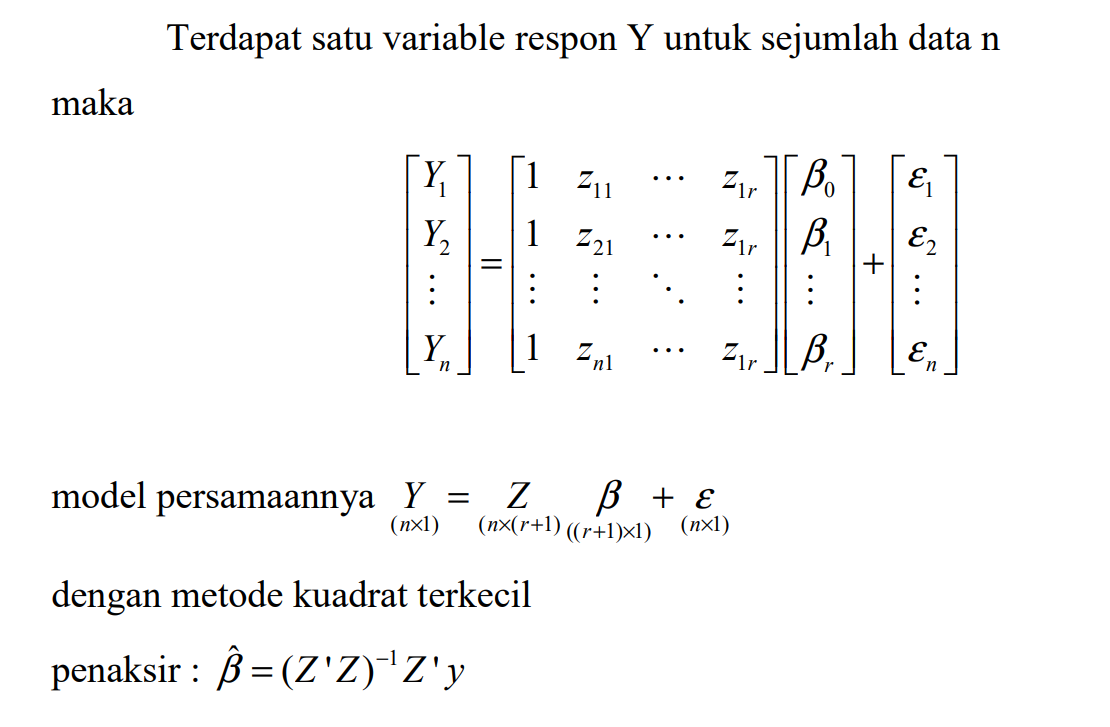

In [30]:
# membuat fungsi untuk mencari koefisien regresi dengan metode kuadrat eror terkecil
from numpy.linalg import inv #mengimport fungsi invers dari library

def model_regresi(X, y):

  # X: np.array berupa float dengan ukuran (n, p-1) dari input, di gambar adalah Z
  # y: np.array berupa float dengan ukuran (n,) dari output, di gambar adalah Y

  (n, p_minus_one) = X.shape #mendapatkan nilai n dan p_minus_one dari ukuran X
  p = p_minus_one + 1 #p=(p-1)+1

  Z = np.ones(shape=(n, p)) #membuat matriks baru berukuran n x p dan seluruh elemen bernilai 1
  Z[:, 1:] = X #meng-overwrite nilai matriks Z menjadi matriks X lama kecuali kolom pertama
  B = np.dot(np.dot(inv(np.dot(Z.T, Z)), Z.T), y) #variabel B merupakan koefisien regresi yang didapatkan dari operasi matriks seperti pada gambar

  return B

In [31]:
# membuat fungsi untuk mendapatkan nilai prediksi dari model regresi dan nilai variabel input
def prediksi_terbaik(model, X): 

  # model: np.array berupa float dengan ukuran (p,) dari parameter regresi
  # X: np.array berupa float dengan ukuran (n, p-1) dari nilai variabel input

  (n, p_minus_one) = X.shape #mendapatkan nilai n dan p_minus_one dari ukuran X
  p = p_minus_one + 1 #p=(p-1)+1

  Z = np.ones(shape=(n, p)) #membuat matriks baru berukuran n x p dan seluruh elemen bernilai 1
  Z[:, 1:] = X #meng-overwrite nilai matriks Z menjadi matriks X lama kecuali kolom pertama

  y_prediksi = np.dot(Z, model) #mengkalikan koefisien regresi dengan nilai variabel yang bersesuaian

  return y_prediksi

## Menggunakan fungsi untuk memperoleh koefisien regresi dan nilai prediksi

In [35]:
model_terbaik = model_regresi(X_train, y_train) #mencari model terbaik dengan memanggil fungsi dan mengolah input menggunakan fungsi tersebut
model_terbaik

array([-9.68471274e+02,  4.81304272e-01,  5.25621901e-01, -1.21350189e-06])

In [ ]:
prediksi = prediksi_terbaik(model_terbaik, X_train) #menghitung nilai Selling_Price dari koefisien regresi dari data yang sudah ada
prediksi

In [ ]:
prediksi_baru = prediksi.reshape(-1,1) #resharing variabel prediksi Selling_Price
prediksi_baru

In [38]:
prediksi_data['Prediksi Terbaik'] = prediksi_baru #menambahkan kolom prediksi harga terbaik ke tabel data
prediksi_data

,Tahun pembelian,Harga Mobil Baru Saat Ini,Jarak Tempuh (KM),Harga Jual Mobil Bekas,Prediksi Terbaik
0,2014,5.59,27000,3.35,3.780991
1,2013,9.54,43000,4.75,5.356477
2,2017,9.85,6900,7.25,7.488445
3,2011,4.15,5200,2.85,1.606637
4,2014,6.87,42450,4.60,4.435039
...,...,...,...,...,...
296,2016,11.60,33988,9.50,7.894107
297,2015,5.90,60000,4.00,4.385193
298,2009,11.00,87934,3.35,4.144141
299,2017,12.50,9000,11.50,8.878794


## MENGHITUNG EROR

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [42]:
mean_absolute_error(prediksi_data['Prediksi Terbaik'], y_train), mean_squared_error(prediksi_data['Prediksi Terbaik'], y_train)

(1.2627058504570692, 3.8595166657592586)

In [45]:
# mencari normalized mean squared error
import math
MAE = mean_absolute_error(prediksi_data['Prediksi Terbaik'], y_train)
MSE = mean_squared_error(prediksi_data['Prediksi Terbaik'], y_train)
RMSE = math.sqrt(MSE)
print ('nilai Mean Squared Error adalah ', MSE)
print ('nilai Mean Absolute Error adalah ', MAE)
print('nilai Root Mean Squared Error adalah',RMSE)
ymax = data['Selling_Price'].max()
ymin = data['Selling_Price'].min()
print ('nilai harga maksimal adalah ', ymax,'dan nilai harga minimal adalah',ymin)
NRMSE = RMSE/(ymax-ymin)
print ('Normalized Mean Squared Error is ', NRMSE)

nilai Mean Squared Error adalah  3.8595166657592586
nilai Mean Absolute Error adalah  1.2627058504570692
nilai Root Mean Squared Error adalah 1.9645652612624653
nilai harga maksimal adalah  35.0 dan nilai harga minimal adalah 0.1
Normalized Mean Squared Error is  0.0562912682310162
